## Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## Reading the dataset

In [2]:
#Load and inspect the datset
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.shape)
print(dataset.dtypes)

(200, 4)
CustomerID            int64
Age                   int64
Annual_Income_(k$)    int64
Spending_Score        int64
dtype: object


## Handling null values

In [3]:
dataset.isnull().sum()

CustomerID            0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

The dataset has no null values

## Handling duplicate values

In [4]:
dataset.duplicated().sum()

np.int64(0)

The dataset has no duplicated values

## Analyzing the dataset

In [5]:
#Checking dataset statistics
dataset.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Standardizing the data

In [9]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(dataset))
print(scaled_data)

            0         1         2         3
0   -1.723412 -1.424569 -1.738999 -0.434801
1   -1.706091 -1.281035 -1.738999  1.195704
2   -1.688771 -1.352802 -1.700830 -1.715913
3   -1.671450 -1.137502 -1.700830  1.040418
4   -1.654129 -0.563369 -1.662660 -0.395980
..        ...       ...       ...       ...
195  1.654129 -0.276302  2.268791  1.118061
196  1.671450  0.441365  2.497807 -0.861839
197  1.688771 -0.491602  2.497807  0.923953
198  1.706091 -0.491602  2.917671 -1.250054
199  1.723412 -0.635135  2.917671  1.273347

[200 rows x 4 columns]


## Clustering

### Finding optimal number of clusters by elbow method

In [31]:
#Calculating inertias
max_clusters = 10
k = range(1,max_clusters + 1)
inertia = []
for i in k:
    model = KMeans(n_clusters=i,random_state=10).fit(scaled_data)
    inertia.append(model.inertia_)
for i in range(0,max_clusters):
    print(f"{i+1} : {inertia[i]}")

1 : 799.9999999999999
2 : 515.6688891233371
3 : 375.2643070614756
4 : 259.69362556823944
5 : 213.62565884784942
6 : 161.39271122939357
7 : 147.14663582548994
8 : 132.0073460425834
9 : 117.93456492988417
10 : 106.21260195672457


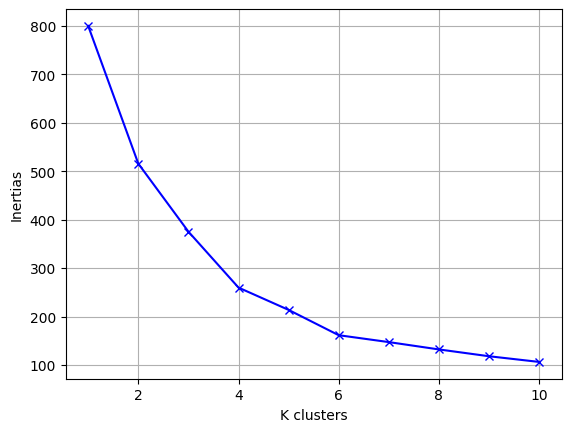

In [32]:
#Inertia vs k clusters plot
plt.plot(k,inertia,'bx-')
plt.grid()
plt.xlabel('K clusters')
plt.ylabel('Inertias')
plt.show()

The optimal number of clusters is 6.

### Applying kmeans algorithm for 6 clusters

In [39]:
clusters = 6
kmean_model = KMeans(n_clusters=clusters,random_state=5).fit(scaled_data)
labels = kmean_model.labels_

### Labelling customers according to clusters

In [53]:
modified_data = dataset.copy()
modified_data['Group'] = labels + 1

## Visualisation

### Pricipal Component Analysis

In [54]:
from sklearn.decomposition import PCA

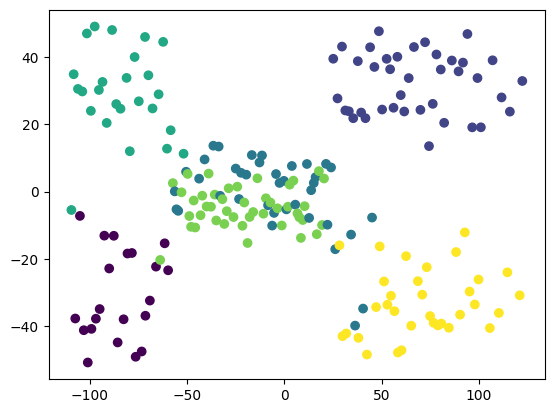

In [74]:
pca = PCA(n_components=2)
dataset_for_visualization = pca.fit_transform(modified_data)
x = dataset_for_visualization[:,0]
y = dataset_for_visualization[:,1]
plt.scatter(x,y,c=modified_data['Group'],cmap='viridis')
plt.show()

### Pair plot

In [76]:
from seaborn import pairplot

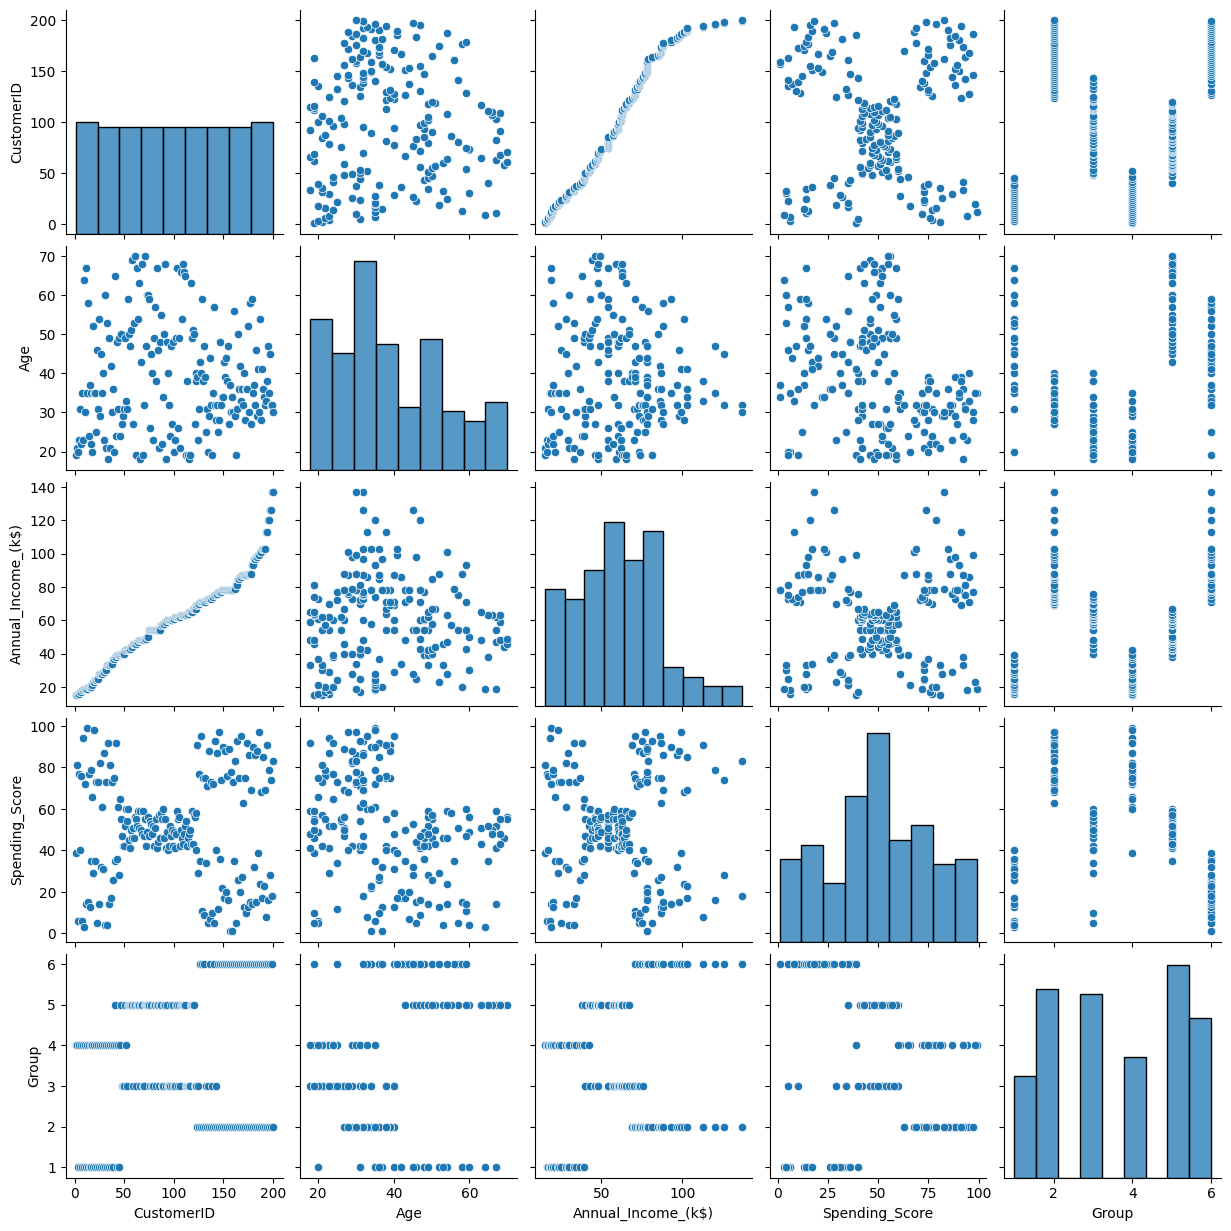

In [82]:
pairplot(modified_data)
plt.show()

## Recommendations

1. Customers belonging to groups 2 and 4 have the highest spending scores. So, they are the ideal groups for loyalty programs like special discounts and gifts.
2. Customers beonging to groups 2 and 6 have the highest annual income. So, they should be offered premium items and promotions.
3. Groups 2,3 and 4 have age ranging from 20 to 40. Groups 1,5 and 6 have people of all ranges but more people are of above age 40. So, appropriate products can be focused accordingly.

## Writing modified dataset to csv

In [85]:
dataset['Group'] = modified_data['Group']
filename = 'Mall_Customers_grouped.csv'
with open(filename,'w') as file:
    modified_data.to_csv(path_or_buf=file)